Importing Libraries

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [59]:
home_data = pd.read_csv("housing.csv", usecols=['longitude', 'latitude', 'median_house_value'])
home_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


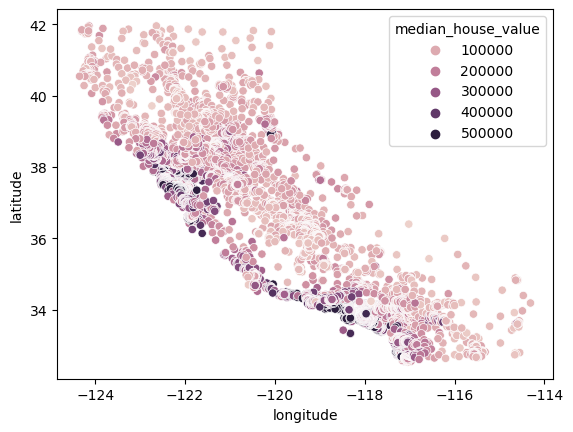

In [60]:
sns.scatterplot(data=home_data, x = 'longitude', y = 'latitude', hue = 'median_house_value')
plt.show()


In [61]:
normalized_data = preprocessing.normalize(home_data[['latitude','longitude']])

In [62]:
print(normalized_data)

[[ 0.29601821 -0.9551823 ]
 [ 0.29589769 -0.95521964]
 [ 0.29578221 -0.9552554 ]
 ...
 [ 0.30932376 -0.95095679]
 [ 0.30909316 -0.95103176]
 [ 0.30885191 -0.95111014]]


c:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


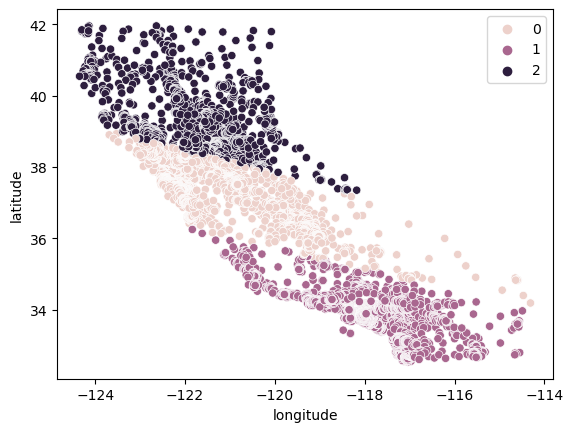

In [63]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(normalized_data)
sns.scatterplot(data = home_data[['latitude','longitude']], x = 'longitude', y = 'latitude', hue = kmeans.labels_)
plt.show()

In [64]:
centers = kmeans.cluster_centers_
print("centers ", centers)

centers  [[ 0.29455492 -0.95562971]
 [ 0.2759987  -0.96115263]
 [ 0.30669856 -0.95179215]]


In [66]:
print(silhouette_score(normalized_data,kmeans.labels_, metric = 'euclidean'))

0.7499115323392395
